In [1]:
import scanpy as sc
import requests
import scvi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import scdrs

[rank: 0] Global seed set to 0
/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tox_adata = sc.read_h5ad("/project/gilad/jpopp/cellcipher/data/merged_1_to_7/single_cell_objects/filtered_pflog1ppfnorm.hvg.umap_embedding.h5ad")
tox_adata_raw = sc.read_h5ad("/project/gilad/jpopp/cellcipher/data/merged_1_to_7/single_cell_objects/filtered.h5ad")

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
assert tox_adata.obs.index.equals(tox_adata_raw.obs.index)

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


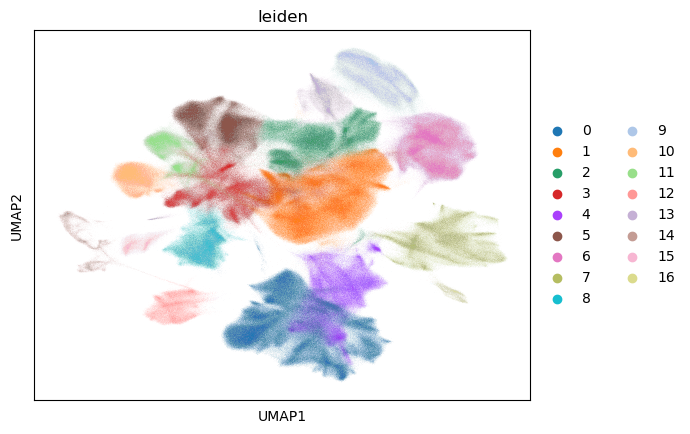

In [4]:
sc.pl.umap(tox_adata, color='leiden')

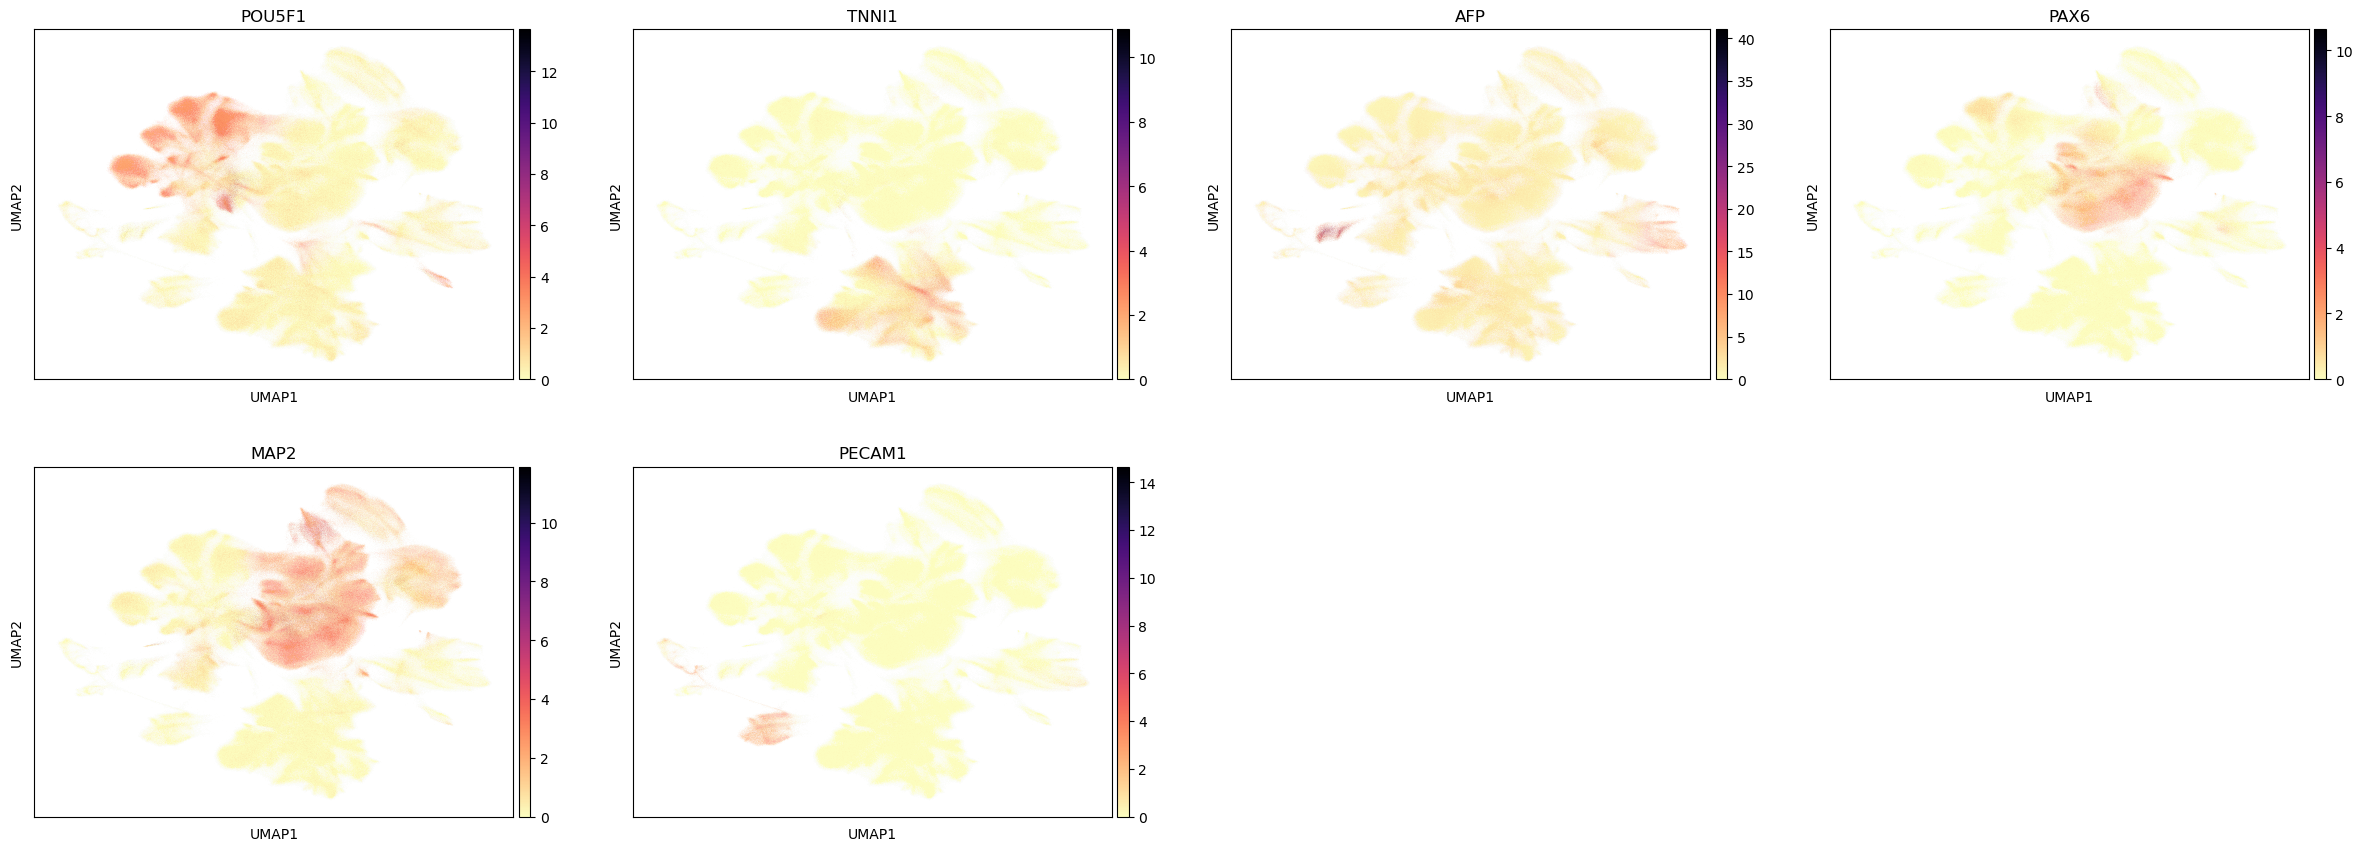

In [5]:
sc.pl.umap(tox_adata, color=['POU5F1', 'TNNI1', 'AFP', 'PAX6', 'MAP2', 'PECAM1'], color_map='magma_r')

In [6]:
celltype_labels = {0: 'mesoderm',
                  1: 'ectoderm',
                  2: 'ectoderm',
                  3: 'pluripotent',
                  4: 'mesoderm',
                  5: 'pluripotent',
                  6: 'ectoderm',
                  7: 'endoderm',
                  8: 'ectoderm',
                  9: 'ectoderm',
                  10: 'pluripotent',
                  11: 'pluripotent',
                  12: 'mesoderm',
                  13: 'ectoderm',
                  14: 'endoderm',
                  15: 'endoderm',
                  16: 'endoderm'}

In [7]:
tox_adata.obs['celltype'] = [celltype_labels[int(c)] for c in tox_adata.obs['leiden']]

Note which batch each cell came from

In [8]:
def extract_cell_label(sample_id):
    if sample_id.split('-')[4] == 'Tox':
        return 'Tox1'
    elif sample_id.split('-')[3] == 'Tox2':
        return 'Tox2'
    elif sample_id.split('-')[5] == 'Tox3':
        return 'Tox3'
    elif sample_id.split('-')[4] == 'Tox4':
        return 'Tox4'
    elif sample_id.split('-')[3] == 'Tox5':
        return 'Tox5'
    elif sample_id.split('-')[4] == 'Tox6':
        return 'Tox6'
    elif sample_id.split('-')[4] == 'Tox7':
        return 'Tox7'

In [9]:
tox_adata.obs['batch'] = [extract_cell_label(sid) for sid in tox_adata.obs.sample_id]

In [10]:
def assign_treatment_for_batch(batch, treatment):
    if batch == 'Tox1':
        treatment_map = {
            '01': 'DMSO',
            '02': 'DMSO',
            '03': 'Difloxacin',
            '04': 'Difloxacin',
            '05': 'Ambrisentan',
            '06': 'Ambrisentan',
            '07': 'BIA',
            '08': 'BIA',
            '09': 'Fialuridine',
            '10': 'Fialuridine',
            '11': 'Benfluorex_DMSO',
            '12': 'Benfluorex_DMSO',
            '13': 'Benfluorex_H2O',
            '14': 'Benfluorex_H2O',
            '15': 'Pergolide',
            '16': 'Pergolide'
        }
    elif batch == 'Tox2':
        treatment_map = {
            'Rof': 'Rofecoxib',
            'Sit': 'Sitaxsentan',
            'Ome': 'Omeprazole',
            'Per': 'Perhexilene',
            'Rim': 'Rimonabant',
            'Ace': 'Acetaminophen',
            'Dox': 'Doxycycline',
            'Nef': 'Nefazodone'
        }
    elif batch == 'Tox3':
        treatment_map = {
            '01': 'Penicillin',
            '02': 'Penicillin',
            '03': 'Ibuprofen',
            '04': 'Ibuprofen',
            '05': 'Astemizole',
            '06': 'Astemizole',
            '07': 'Temafloxacin',
            '08': 'Temafloxacin',
            '09': 'Grepafloxacin',
            '10': 'Grepafloxacin',
            '11': 'Cisapride',
            '12': 'Cisapride',
            '13': 'Troglitazone',
            '14': 'Troglitazone',
            '15': 'Asunaprevir',
            '16': 'Asunaprevir'
        }
    elif batch == 'Tox4': 
        treatment_map = {
            '1': 'Pioglitazone',
            '2': 'Pioglitazone',
            '3': 'Aspirin',
            '4': 'Aspirin',
            '5': 'BMS986094',
            '6': 'BMS986094',
            '7': 'Tolcapone',
            '8': 'Tolcapone',
            '9': 'Ximelagatran',
            '10': 'Ximelagatran',
            '11': 'Naloxone',
            '12': 'Naloxone',
            '13': 'Telithromycin',
            '14': 'Telithromycin',
            '15': 'Meclizine',
            '16': 'Meclizine'
        }
    elif batch == 'Tox5':
        treatment_map = {
            'Ben': 'Benoxaprofen',
            'Val': 'Valdecoxib',
            'Dex': 'Dextromethorphan',
            'Ent': 'Entacapone',
            'Lor': 'Loratadine',
            'Bus': 'Buspirone',
            'Muz': 'Muzolimine',
            'Ola': 'Olanzapine'
        }
    elif batch == 'Tox6':
        treatment_map = {
            '1': 'Prenylamine',
            '2': 'Prenylamine',
            '3': 'Droxicam',
            '4': 'Droxicam',
            '5': 'Chlorpheniramine',
            '6': 'Chlorpheniramine',
            '7': 'Amoxycillin',
            '8': 'Amoxycillin',
            '9': 'Simvastatin',
            '10': 'Simvastatin', 
            '11': 'Gemifloxacin',
            '12': 'Gemifloxacin',
            '13': 'Diamthazole',
            '14': 'Diamthazole', 
            '15': 'Propranolol',
            '16': 'Propranolol'
        }
    elif batch == 'Tox7':
        treatment_map = {
            'Met': 'Metformin',
            'Enc': 'Encainide', 
            'Phe': 'Pheniprazine',
            'Nor': 'Norfenfluramine',
            'Pra': 'Pravastatin',
            'Dip': 'Diphenhydramine',
            'Clo': 'Clobutinol',
            'Van': 'Vancomycin'
        }
    return(treatment_map[treatment])

In [11]:
tox_adata.obs['treatment_name'] = tox_adata.obs.apply(lambda cell: assign_treatment_for_batch(cell['batch'], cell['treatment']), axis=1)

In [12]:
tox_adata.obs[['treatment_name']].value_counts()

treatment_name  
Cisapride           74957
Ximelagatran        59189
Meclizine           57338
Ibuprofen           56454
Rofecoxib           55623
Gemifloxacin        55231
Naloxone            54878
Sitaxsentan         53264
Aspirin             52256
Diamthazole         51819
Valdecoxib          51413
Telithromycin       50632
Tolcapone           50575
Grepafloxacin       50378
Dextromethorphan    49767
Entacapone          48865
Metformin           48154
Omeprazole          47880
Pioglitazone        47706
Benoxaprofen        47629
Droxicam            47578
Prenylamine         47546
Troglitazone        47230
Propranolol         46897
Encainide           46701
BMS986094           46513
Pheniprazine        46139
Ambrisentan         46121
Amoxycillin         46042
Perhexilene         45587
Chlorpheniramine    45399
Simvastatin         45251
Penicillin          44717
Rimonabant          43556
Loratadine          42922
Acetaminophen       42510
Doxycycline         41813
Difloxacin          4

In [13]:
tox_adata.obs

,sample_id,sample_barcode,donor_id,prob_max,prob_doublet,n_vars,best_singlet,best_doublet,doublet_logLikRatio,n_genes,...,total_counts,total_counts_mt,pct_counts_mt,treatment,_scvi_batch,_scvi_labels,leiden,celltype,batch,treatment_name
cell,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGATAGTCA-1,YG-KR-10X-13s-Tox-04,AAACCCAAGATAGTCA,NA19210,1.0,4.920000e-26,465,NA19210,"NA18519,NA19210",-56.404,3063,...,6096.0,194.0,3.182415,04,0,0,6,ectoderm,Tox1,Difloxacin
AAACCCAAGATGAAGG-1,YG-KR-10X-13s-Tox-04,AAACCCAAGATGAAGG,NA19210,1.0,1.590000e-06,151,NA19210,"NA18519,NA19210",-11.480,1035,...,1287.0,5.0,0.388500,04,0,0,6,ectoderm,Tox1,Difloxacin
AAACCCAAGCGCCTTG-1,YG-KR-10X-13s-Tox-04,AAACCCAAGCGCCTTG,NA18912,1.0,6.150000e-17,307,NA18912,"NA18519,NA18912",-35.458,1927,...,3933.0,190.0,4.830918,04,0,0,9,ectoderm,Tox1,Difloxacin
AAACCCAAGCGTTACT-1,YG-KR-10X-13s-Tox-04,AAACCCAAGCGTTACT,NA18912,1.0,1.450000e-34,623,NA18912,"NA18519,NA18912",-76.047,3931,...,8827.0,263.0,2.979495,04,0,0,4,mesoderm,Tox1,Difloxacin
AAACCCAAGCTACAAA-1,YG-KR-10X-13s-Tox-04,AAACCCAAGCTACAAA,NA18912,1.0,2.290000e-14,339,NA18912,"NA18519,NA18912",-29.537,2678,...,5154.0,110.0,2.134265,04,0,0,1,ectoderm,Tox1,Difloxacin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCTCAGAT-16,YG-KR-16S-1002-Tox7-3-Enc,TTTGTTGGTCTCAGAT,NA19210,1.0,1.180000e-20,248,NA19210,"NA19210,NA18519",-44.195,1917,...,5979.0,7.0,0.117076,Enc,0,0,3,pluripotent,Tox7,Encainide
TTTGTTGTCAGCTTGA-16,YG-KR-16S-1002-Tox7-3-Enc,TTTGTTGTCAGCTTGA,NA18519,1.0,1.500000e-53,1085,NA18519,"NA18519,NA19093",-119.944,4510,...,10976.0,189.0,1.721939,Enc,0,0,6,ectoderm,Tox7,Encainide
TTTGTTGTCCAGCTCT-16,YG-KR-16S-1002-Tox7-3-Enc,TTTGTTGTCCAGCTCT,NA18912,1.0,2.950000e-48,1067,NA18912,"NA19210,NA19093",-107.751,4393,...,10831.0,90.0,0.830948,Enc,0,0,6,ectoderm,Tox7,Encainide


In [14]:
cell_subset = tox_adata.obs[['sample_id', 'donor_id', 'celltype', 'treatment_name']]
cell_subset['pseudobulk_sample'] = cell_subset['sample_id'].astype(str) + '_' + cell_subset['donor_id'].astype(str) + '_' + cell_subset['celltype'].astype(str) + '_' + cell_subset['treatment_name'].astype(str)

/scratch/local/jobs/19325991/ipykernel_1787811/921276003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_subset['pseudobulk_sample'] = cell_subset['sample_id'].astype(str) + '_' + cell_subset['donor_id'].astype(str) + '_' + cell_subset['celltype'].astype(str) + '_' + cell_subset['treatment_name'].astype(str)


In [15]:
onehot = OneHotEncoder(sparse=True).fit_transform(cell_subset[['pseudobulk_sample']])
onehot

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<2483987x2166 sparse matrix of type '<class 'numpy.float64'>'
	with 2483987 stored elements in Compressed Sparse Row format>

In [16]:
pseudobulk_sum = tox_adata_raw.X.transpose() * onehot

In [17]:
pseudobulk_sum = pd.DataFrame(pseudobulk_sum.todense(),
                              index=tox_adata_raw.var_names, 
                              columns=cell_subset['pseudobulk_sample'].astype("category").cat.categories).astype(int)

In [15]:
pseudobulk_sum.to_csv("/project/gilad/jpopp/cellcipher/data/merged_1_to_7/pseudobulk_expression.tsv", sep="\t")

In [18]:
treatment_dict = tox_adata.obs[['sample_id', 'treatment', 'treatment_name']].drop_duplicates()

In [19]:
treatment_dict

,sample_id,treatment,treatment_name
cell,,,
AAACCCAAGATAGTCA-1,YG-KR-10X-13s-Tox-04,04,Difloxacin
AAACCCAAGAATTGTG-2,YG-KR-10X-13s-Tox-03,03,Difloxacin
AAACCCAAGACCATTC-3,YG-KR-10X-13s-Tox-02,02,DMSO
AAACCCAAGACGACGT-4,YG-KR-10X-13s-Tox-05,05,Ambrisentan
AAACCCAAGACAGTCG-5,YG-KR-10X-13s-Tox-09,09,Fialuridine
...,...,...,...
AAACCCAAGAACGCGT-12,YG-KR-16S-1002-Tox7-5-Pra,Pra,Pravastatin
AAACCCAAGAGCCATG-13,YG-KR-16S-1002-Tox7-13-Phe,Phe,Pheniprazine
AAACCCAAGACTCAAA-14,YG-KR-16S-1002-Tox7-4-Enc,Enc,Encainide


In [18]:
treatment_dict.to_csv("/project/gilad/jpopp/cellcipher/data/merged_1_to_7/treatment_dict.tsv", sep="\t", index=False)

Save the annotated anndata object

In [20]:
tox_adata.write_h5ad("/project/gilad/jpopp/cellcipher/data/merged_1_to_7/single_cell_objects/filtered_pflog1ppfnorm.hvg.umap_embedding.annotated.h5ad")

## Further threshold by module scoring (scanpy approach)

In [3]:
def read_gmt_file(file_path, gene_list):
    data_list = []
    
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split()
            if elements[0] == gene_list:
                return elements[2:]

# Example usage:
gmt_file_path = '/project2/gilad/jpopp/ebQTL/data/gene_sets/MUELLER_PLURINET.v2023.2.Hs.gmt'
plurinet_genes = read_gmt_file(gmt_file_path, 'MUELLER_PLURINET')

In [36]:
sc.tl.score_genes(tox_adata, gene_list=plurinet_genes, score_name='pluripotency_score')

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


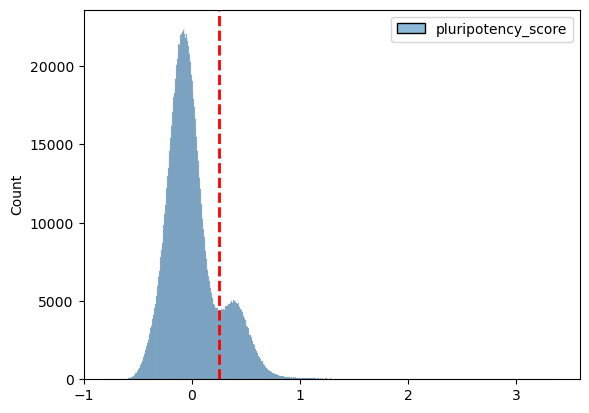

In [43]:
sns.histplot(tox_adata.obs[['pluripotency_score']])
plt.axvline(x=0.25, linestyle='--', color='red', linewidth=2)

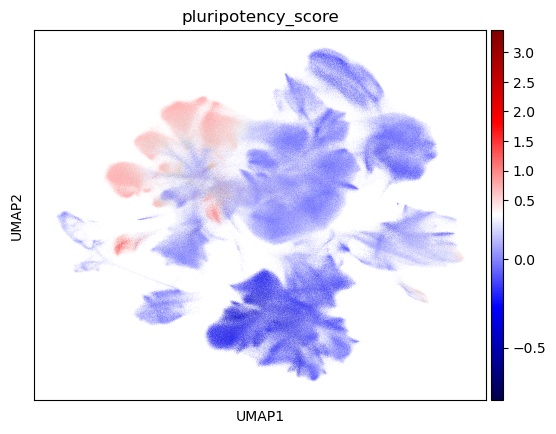

In [90]:
sc.pl.umap(tox_adata, color='pluripotency_score', color_map='seismic', vcenter=0.25)

In [17]:
hep_markers = pd.read_csv("/project2/gilad/jpopp/ebQTL/data/gene_sets/hep_lineage.tsv", sep="\t")
hep_markers = hep_markers.loc[hep_markers['Stage'].isin(['de', 'prog', 'hep'])]['Gene']

In [94]:
sc.tl.score_genes(tox_adata, gene_list=hep_markers, score_name='endoderm_score')

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


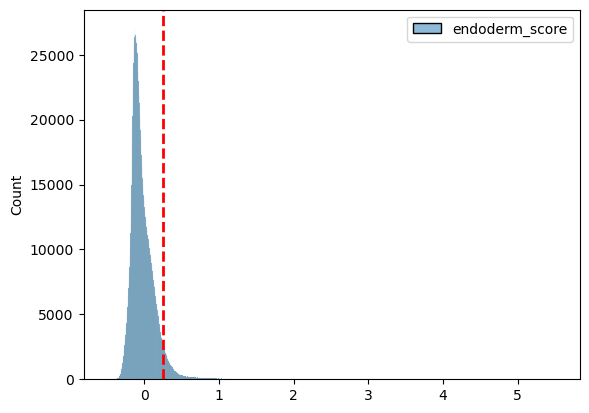

In [95]:
sns.histplot(tox_adata.obs[['endoderm_score']])
plt.axvline(x=0.25, linestyle='--', color='red', linewidth=2)

In [13]:
full_gmt_file_path = '/project2/gilad/jpopp/ebQTL/data/gene_sets/c5.go.bp.v2023.1.Hs.symbols.gmt'
endoderm_genes = read_gmt_file(full_gmt_file_path, 'GOBP_ENDODERM_DEVELOPMENT')

In [14]:
hepaticobiliary_genes = read_gmt_file(full_gmt_file_path, 'GOBP_HEPATICOBILIARY_SYSTEM_DEVELOPMENT')

In [100]:
[g for g in hepaticobiliary_genes if g in plurinet_genes]

['PRMT5', 'PCNA', 'CCND1', 'AURKA']

In [75]:
augmented_endoderm_genes = list(set(endoderm_genes).union(set(hepaticobiliary_genes)))

In [77]:
len(endoderm_genes)

83

In [98]:
sc.tl.score_genes(tox_adata, gene_list=augmented_endoderm_genes, score_name='endoderm_score', n_bins=50)

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


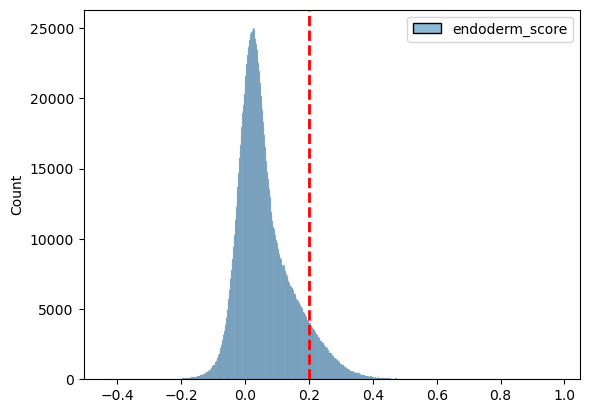

In [99]:
sns.histplot(tox_adata.obs[['endoderm_score']])
plt.axvline(x=0.2, linestyle='--', color='red', linewidth=2)

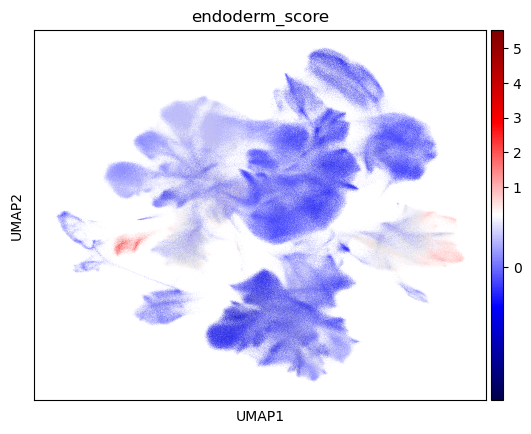

In [96]:
sc.pl.umap(tox_adata, color='endoderm_score', color_map='seismic', vcenter=0.2)

In [63]:
mesoderm_genes = read_gmt_file(full_gmt_file_path, 'GOBP_MESODERM_DEVELOPMENT')

In [65]:
sc.tl.score_genes(tox_adata, gene_list=mesoderm_genes, score_name='mesoderm_score')

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


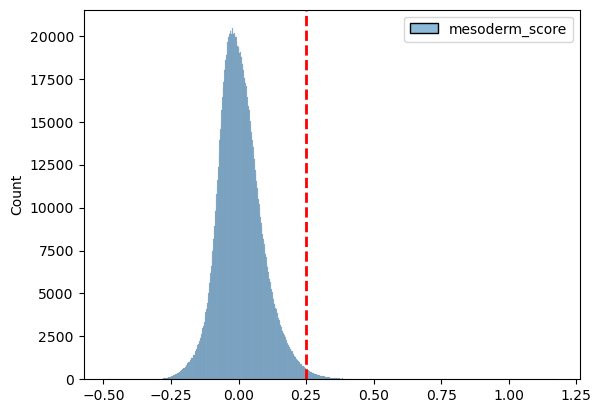

In [66]:
sns.histplot(tox_adata.obs[['mesoderm_score']])
plt.axvline(x=0.25, linestyle='--', color='red', linewidth=2)

In [68]:
ectoderm_genes = read_gmt_file(full_gmt_file_path, 'GOBP_ECTODERM_DEVELOPMENT')

In [69]:
sc.tl.score_genes(tox_adata, gene_list=ectoderm_genes, score_name='ectoderm_score')

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


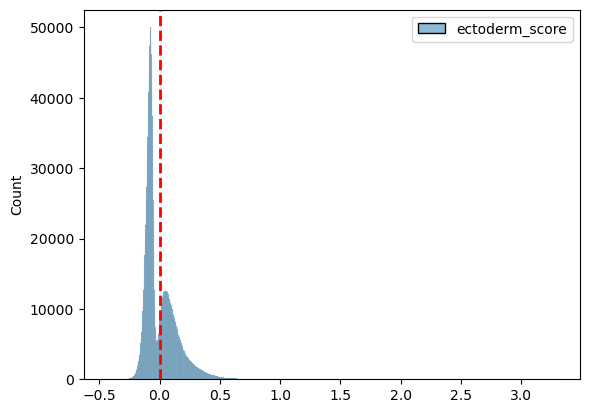

In [72]:
sns.histplot(tox_adata.obs[['ectoderm_score']])
plt.axvline(x=0, linestyle='--', color='red', linewidth=2)

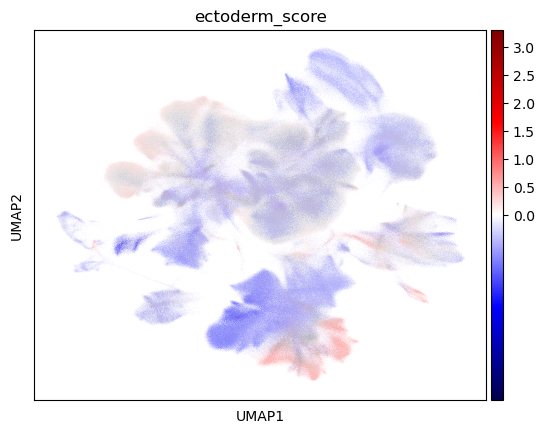

In [91]:
sc.pl.umap(tox_adata, color='ectoderm_score', color_map='seismic', vcenter=0)

## scDRS Approach

In [2]:
tox_adata = sc.read_h5ad("/project/gilad/jpopp/cellcipher/data/merged_1_to_7/single_cell_objects/filtered_pflog1ppfnorm.hvg.umap_embedding.annotated.h5ad")

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
tox_adata.X = tox_adata.layers['log1pPF']

In [6]:
scdrs.pp.preprocess(tox_adata)

In [7]:
pluripotency_scores = scdrs.score_cell(tox_adata, gene_list=plurinet_genes, n_ctrl=50)

Computing control scores: 100%|██████████| 50/50 [03:29<00:00,  4.19s/it]


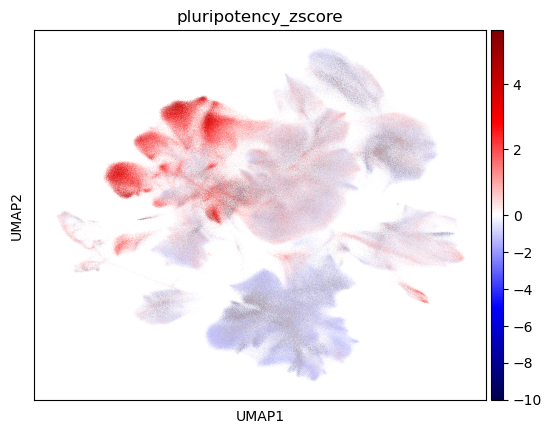

In [41]:
tox_adata.obs['pluripotency_zscore'] = pluripotency_scores['zscore']
sc.pl.umap(tox_adata, color='pluripotency_zscore', color_map='seismic', vcenter=0)

In [18]:
endoderm_scores = scdrs.score_cell(tox_adata, gene_list=hep_markers, n_ctrl=50)

Computing control scores: 100%|██████████| 50/50 [03:01<00:00,  3.64s/it]


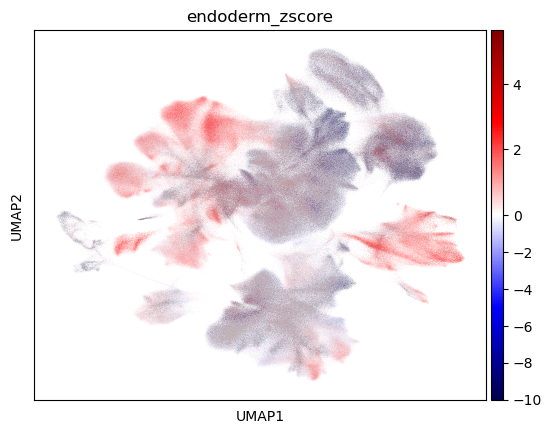

In [40]:
tox_adata.obs['endoderm_zscore'] = endoderm_scores['zscore']
sc.pl.umap(tox_adata, color='endoderm_zscore', color_map='seismic', vcenter=0)

In [25]:
cm_markers = pd.read_csv("/project2/gilad/jpopp/ebQTL/data/gene_sets/cm_lineage.tsv", sep="\t")
cm_markers = cm_markers.loc[cm_markers['Stage'].isin(['meso', 'prog', 'cm'])]['Gene']

In [27]:
mesoderm_scores = scdrs.score_cell(tox_adata, gene_list=cm_markers, n_ctrl=50)

Computing control scores: 100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


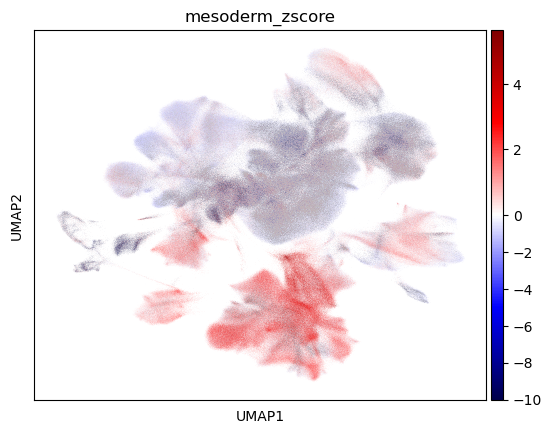

In [39]:
tox_adata.obs['mesoderm_zscore'] = mesoderm_scores['zscore']
sc.pl.umap(tox_adata, color='mesoderm_zscore', color_map='seismic', vcenter=0)

In [31]:
neur_markers = pd.read_csv("/project2/gilad/jpopp/ebQTL/data/gene_sets/neur_lineage.tsv", sep="\t")
neur_markers = neur_markers.loc[neur_markers['Stage'] != 'ipsc']['Gene']

In [33]:
ectoderm_scores = scdrs.score_cell(tox_adata, gene_list=neur_markers, n_ctrl=50)

Computing control scores: 100%|██████████| 50/50 [03:25<00:00,  4.11s/it]


In [37]:
ectoderm_scores

,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
cell,,,,,,
AAACCCAAGATAGTCA-1,0.041334,-1.462194,0.941176,9.408024e-01,0.026502,-1.561545
AAACCCAAGATGAAGG-1,0.041225,-0.886630,0.823529,8.022923e-01,0.095667,-0.849838
AAACCCAAGCGCCTTG-1,0.732747,5.896758,0.019608,3.542692e-07,6.450666,4.959009
AAACCCAAGCGTTACT-1,0.071104,-0.884847,0.784314,8.016791e-01,0.095999,-0.847634
AAACCCAAGCTACAAA-1,0.143459,1.065928,0.156863,1.496027e-01,0.825061,1.038139
...,...,...,...,...,...,...
TTTGTTGGTCTCAGAT-16,0.075100,0.072806,0.372549,4.250226e-01,0.371588,0.189061
TTTGTTGTCAGCTTGA-16,0.072593,-0.815991,0.784314,7.773545e-01,0.109381,-0.763289
TTTGTTGTCCAGCTCT-16,0.107537,-0.577121,0.666667,6.850544e-01,0.164275,-0.481880


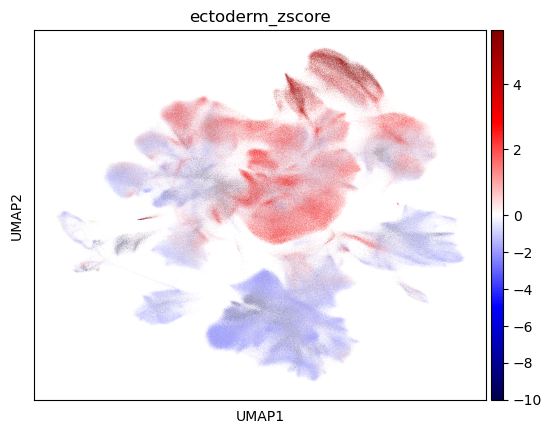

In [38]:
tox_adata.obs['ectoderm_zscore'] = ectoderm_scores['zscore']
sc.pl.umap(tox_adata, color='ectoderm_zscore', color_map='seismic', vcenter=0)

In [48]:
tox_adata.obs[['celltype_strict']] = 'unassigned'
for i in range(tox_adata.obs.shape[0]):
    if (tox_adata.obs['celltype'][i] == 'ectoderm') & (tox_adata.obs['ectoderm_zscore'][i] >= 2):
        tox_adata.obs['celltype_strict'][i] = 'ectoderm'
    elif (tox_adata.obs['celltype'][i] == 'mesoderm') & (tox_adata.obs['mesoderm_zscore'][i] >= 2):
        tox_adata.obs['celltype_strict'][i] = 'mesoderm'
    elif (tox_adata.obs['celltype'][i] == 'endoderm') & (tox_adata.obs['endoderm_zscore'][i] >= 2):
        tox_adata.obs['celltype_strict'][i] = 'endoderm'
    elif (tox_adata.obs['celltype'][i] == 'pluripotent') & (tox_adata.obs['pluripotency_zscore'][i] >= 2):
        tox_adata.obs['celltype_strict'][i] = 'pluripotent'

/scratch/local/jobs/19339967/ipykernel_1935348/3676256420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_adata.obs['celltype_strict'][i] = 'ectoderm'
/scratch/local/jobs/19339967/ipykernel_1935348/3676256420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_adata.obs['celltype_strict'][i] = 'mesoderm'
/scratch/local/jobs/19339967/ipykernel_1935348/3676256420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_adata.o

KeyboardInterrupt: 

In [54]:
reference_mapping = {
    'ectoderm': 'ectoderm_zscore',
    'mesoderm': 'mesoderm_zscore',
    'endoderm': 'endoderm_zscore',
    'pluripotent': 'pluripotency_zscore'
}

# Use np.select() to apply conditions and assign labels
conditions = []
choices = []

for celltype, scdrs_score in reference_mapping.items():
    condition = tox_adata.obs['celltype'] == celltype
    conditions.append(condition)
    
    scdrs_supports = tox_adata.obs[scdrs_score] > 0.2
    choice = np.where(scdrs_supports, celltype, np.nan)
        
    choices.append(choice)

# Apply conditions and assign labels using np.select()
tox_adata.obs['celltype_strict'] = np.select(conditions, choices, default=np.nan)

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


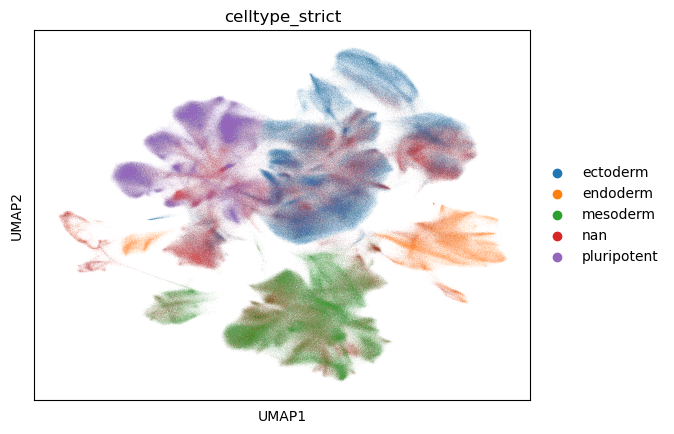

/home/jpopp/.conda/envs/pyro/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


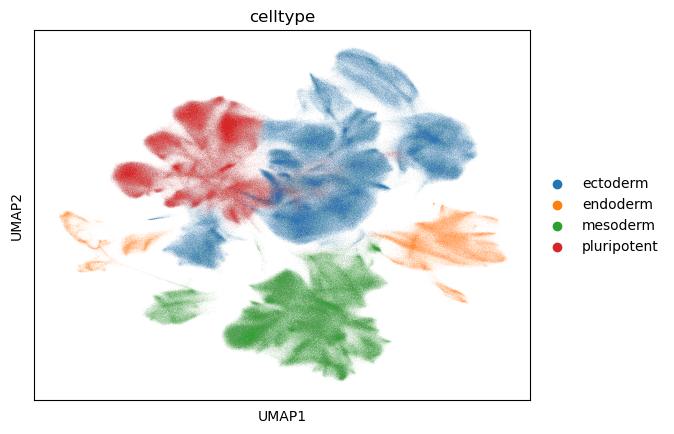

In [55]:
sc.pl.umap(tox_adata, color='celltype_strict')
sc.pl.umap(tox_adata, color='celltype')

In [53]:
tox_adata.obs[['celltype_strict']].value_counts()

celltype_strict
ectoderm           695379
unassigned         669793
mesoderm           533647
pluripotent        443760
endoderm           141408
dtype: int64